# Работа с данными

## Импорт библиотек

Импорт необходимых библиотек

#### pandas
#### numpy

In [1]:
import pandas as pd
import numpy as np

## Загрузка данных

### Создание датафрейма pandas

#### read_csv()

Загрузка датасета "Титаник

In [2]:
df = pd.read_csv('data/titanic/train.csv')

## Первичный анализ по характеристикам датасета

### Вывод первичных характеристик таблицы

#### head()

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Вывод пропущенных значений

#### isnull()

#### isnull().sum()

Проверка того, в каких столбцах отсутствуют значения

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Пропущенные значения

### Заполнение медианным значением столбца

Заполнение пропущенных значений медианным значением столбца

#### median()
#### fillna()
#### fillna(медиана)

In [6]:
median_age = df['Age'].median()            # медиана
df['Age'] = df['Age'].fillna(median_age)   # вставка медианы в проущенные значения

### Заполнение модой столбца

#### mode()
#### fillna(мода)

Заполнение пропущенных значений в столбце "Embarked" наиболее распространенным портом

In [7]:
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Дубликаты

Дубликаты - это ___дублирующиеся строки___, а не значения в отдельном столбце!

### Фильтр дубликатов

#### duplicated()

In [9]:
duplicates = df.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

#### df[дубликаты]

In [10]:
duplicates_df = df[duplicates]
duplicates_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Удаление дубликатов

#### drop_duplicates()

In [11]:
df = df.drop_duplicates()

## Исправление некорректных данных

### Замена значений

#### replace()

Исправление неправильных значений в колонке "Sex":

In [12]:
df['Sex'] = df['Sex'].replace('male', 'M')
df['Sex'] = df['Sex'].replace('female', 'F')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S


### Замена по условию

#### loc()

Исправление отрицательных значений в колонке "Fare":

In [14]:
df.loc[df['Fare'] < 0, 'Fare'] = 0

Устранение несоответствий в колонке "Embarked":

In [15]:
df['Embarked'] = df['Embarked'].replace('S', 'Southampton')
df['Embarked'] = df['Embarked'].replace('C', 'Cherbourg')
df['Embarked'] = df['Embarked'].replace('Q', 'Queenstown')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,Southampton


### Замена по словарю с заменяемыми значениями

#### map()

Сопоставление противоречивых значений в столбце "Embarked":

In [17]:
port_map = {'Southampton' : 'S', 'Cherbourg' : 'C', 'Queenstown' : 'Q'}
df['Embarked'] = df['Embarked'].map(port_map)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S


## Категориальные данные

### one-hot encoding

#### get_dummies()

Выполнение one-hot encoding столбца "Sex":

In [19]:
df = pd.get_dummies(df, columns=['Sex'])

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_F,Sex_M
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True


### label encoding

Преобразование текстовых категорий (имён) в числа

Выполнение label encoding столбца "Embarked":

#### sklearn.preprocessing
#### LabelEncoder()
#### fit_transform()

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'].astype(str))

In [22]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_F,Sex_M
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,2,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,2,False,True
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,NaN,1,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,2,False,True
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,2,False,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,2,True,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,0,True,False


## Выбросы

### Фильтр выбросов - zscore

#### zscore(): scipy.stats

Вычисляет, насколько стандартных отклонений отличается значение в каждой ячейке заданного столбца

Установить фильтр на пороговое значение так, чтобы отбирать значения, отличающиеся от стандартного отклонения (по их zscore()) на заднную величину порогового значения (threshold).

In [23]:
from scipy import stats

z = np.abs(stats.zscore(df['Fare']))    # Вычисление Z-score для столбца "Fare"

threshold = 3                           # Установка порогового значения Z-score

outliers = df['Fare'][z > threshold]    # Выявление выбросов на основе Z-score

### Проверка среднего значения

Всегда после любого изменения данных надо ___проверять их среднее___.

#### mean()

Срезнее значение по столбцу

In [24]:
df['Fare'].mean()

32.204207968574636

### Замена выбрасов медианным значением

Предварительно необходимо проверить распределение значений, чтобы правильно подобрать способ (функцию) для заменяемых значений:
- если распределение нормальное (все значения примерно одинаково распределены вокруг их среднего),
  то для замены больше подойдёт среднее значение
- если распределение значений смещено от нормального (неодинаково, т.е. каких-то значений больше, чем других относительно их среднего),
  то для замены подойдёт медиана

Выбросы от порогового значения (threshold = 3):

In [25]:
outliers

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64

#### median(): pandas.dataframe

In [26]:
df.loc[z > threshold, 'Fare'] = df['Fare'].median()   # мадиана - для замены выбросов (значений значительно отклоняющихся от среднего)

___Всегда надо перепроверять среднее___:
- среднее не должно значительно измениться

Если среднее изменяется значительно (как здесь), то возможно способ изменения данных выбран неправильно

In [27]:
df['Fare'].mean()

26.25910482603816

### Винсоризация (Winsorizing)

Замена экстремальных значений менее экстремальными.  
Экстремальные значения устанавливаются на определённый перцентиль,  
т.е. заданный перцентиль устанавливается как экстремальный, и все значения в перцентилях выше принимают его значение

#### winsorize(): scipy.stats.mstats

Пример данных:  

2 4 6 8 10 12 14 16 18 100  

100 - экстремальное значение  
Необходимо уменьшить влияение этого значения на анализ данных: заменить это значение на менее экстремальное.  
Используется ___перцентиль___:  
например, если выбрать перцентиль 10%, то данные можно заменять, начиная с какого-либо из крайних перцентилей, например, начиная с 9-го, т.е. в 9-м, 10-м перцентилях данные будут одинаковые максимальные для 9-го перцентиля:

2 4 6 8 10 12 14 16 18 18 

Винсоризация столбца "Fare":

In [28]:
from scipy.stats.mstats import winsorize

df['Fare'] = winsorize(df['Fare'], limits=[0.05, 0.05])   # limits - верхний и нижний перцентили (5%)

In [29]:
df['Fare'].mean()

24.696483389450055

### Преобразование значений столбца по математической функции

Исключение выбросов через преобразование значений столбца по определённой математической функции.

#### log1p(): numpy

Пересчёт всх значений в зависимости от того, как они относятся на логарифмическую функцию.
Экстремальные значения "сжимаются" в меньший диапозон.

log1p просто вычисляет натуральный логарифм от (аргумент + 1), т.е. $p$ - это аргумент.  
То есть log1p(x) == log(1+p). log() - это натуральный логарифм.  
Эта функция работает лучше для чисел близких к нулю.  

Числа в ряду данных пересчитываются через их натуральный логарифм, благодаря чему сильно отличающиеся значения "выстраиваются" в ближе к ограничивающей их сверх горизонатльной границе (как на графике).  
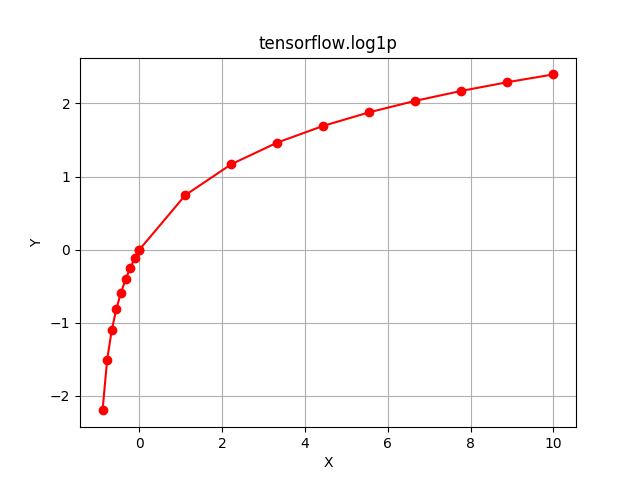

Трансформация столбца "Fare" с помощью логарифмической функции:

In [30]:
df['Fare'] = np.log1p(df['Fare'])

In [31]:
df['Fare'].mean()

2.9203914579094272

Пример:

In [32]:
from statistics import mean

prices = [10, 20, 30, 40, 50, 1000]
mean(prices)

191.66666666666666

In [33]:
log_prices = np.log1p(prices)   # 1000 - "сжимается" в 6.908..., т.е. гораздо ближе к среднему
log_prices

array([2.39789527, 3.04452244, 3.4339872 , 3.71357207, 3.93182563,
       6.90875478])

In [34]:
mean(log_prices)

3.9050928989584657

## Стандартизация данных: sklearn

Пересчёт данных таким образом, что:
- их среднее становится равным нулю,
- экстремальные пределы равны -1, 1, т.е. все данные распределяются в интервале [-1, 1]
- остальные данные распределяются вокруг их среднего.

In [35]:
from sklearn.preprocessing import StandardScaler

data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
print(data.mean())
print(data.std())

4.5
2.29128784747792


### Создание объекта StandardScaler()

#### StandardScaler(): sklearn.preprocessing

In [38]:
scaler = StandardScaler()

#### fit_transform()

Подгонка и преобразование данных к масштабу изменения их значений в интервале [-1, 1] и средним значением 0:

In [39]:
scaled_data = scaler.fit_transform(data)

print(scaled_data)
print(scaled_data.mean())
print(scaled_data.std())

[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]
0.0
1.0


Проверка:

In [40]:
np.array(data).mean()

4.5

In [41]:
type(scaled_data)

numpy.ndarray

## Интеграция данных

In [46]:
sales = pd.read_csv('data/sales/sales.csv')
inventory = pd.read_csv('data/sales/inventory.csv')

In [47]:
sales

,product_id,sales_date,sales_quantity
0,1,2022-01-01,10
1,2,2022-01-01,20
2,1,2022-01-02,15
3,2,2022-01-02,25


In [48]:
inventory

,product_id,sales_date,inventory_level
0,1,2022-01-01,100
1,2,2022-01-01,200
2,1,2022-01-02,90
3,2,2022-01-02,180


### Объединение данных

#### merge()

Объединение столбцов из разных наборов данных.

Объединение данных можно также выполнять напрямую в базе данных: MongoDB, Clickhouse и т.д.

In [50]:
merged_data = pd.merge(sales, inventory, on=['product_id', 'sales_date'], how='left')

In [51]:
merged_data

,product_id,sales_date,sales_quantity,inventory_level
0,1,2022-01-01,10,100
1,2,2022-01-01,20,200
2,1,2022-01-02,15,90
3,2,2022-01-02,25,180


In [57]:
sales2 = pd.read_csv('data/sales/sales2.csv')
sales2

,product_id,region,month,sales_quantity
0,1,North,Jan,10
1,2,North,Jan,20
2,1,South,Jan,15
3,2,South,Jan,25
4,1,North,Feb,12
5,2,North,Feb,22
6,1,South,Feb,18
7,2,South,Feb,28


### Агрегация данных

#### pivot_table()

Агрегация (разбивка) данных по значениям в заданных столбцах набора данных с подсчётом итоговых результатов по заданному итоговому столбцу.

Агрегация (разбивка) данных по значениям столбцов `region`, `month` в наборе данных `sales2` c аггрегирующей функцией (расчёта итогов) суммы `sum` по столбцу итогов `sales_quantity`.  
Задать индекс таблицы по столбцу `product_id`.

In [60]:
pivot_data = sales2.pivot_table(index='product_id', columns=['region', 'month'], values='sales_quantity', aggfunc='sum')

In [61]:
pivot_data

region     North     South    
month        Feb Jan   Feb Jan
product_id                    
1             12  10    18  15
2             22  20    28  25